In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random
%matplotlib inline

from networkx.algorithms import community as com

# Контрольная работа (16 баллов)

## Оптимизация модулярности (теория) (4 балла)

Рассмотрим граф-цикл $C_N$ на $N$ вершинах: каждая вершина имеет ровно две связи с соседними вершинами, расположенными на окружности (ниже пример для $N=10$). Рассмотрим разделение графа на $k$ последовательных сообществ, размера $n=N/k$:  т.е. сообщества формируют вершины соседствующие на окружности (см. Рисунок). Определите оптимальные размер кластера и число кластеров на графе, считая что оптимальное разбиение соответвует максимальной модулярности. Для простоты считайте, что $n$ целое.

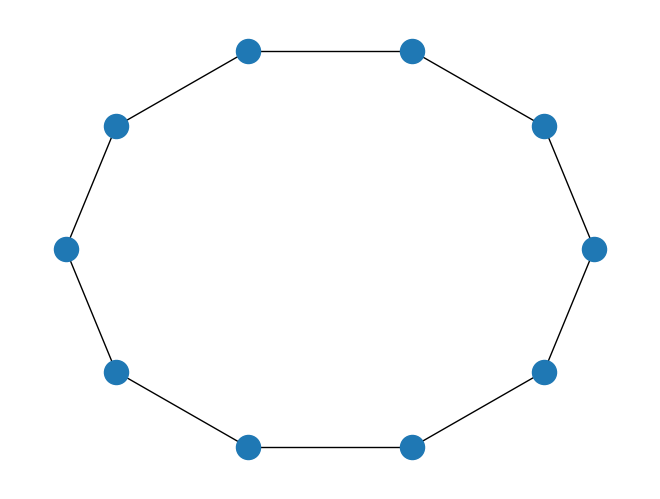

In [2]:
N=10 # граф-цикл
C=nx.cycle_graph(N)
pos = nx.circular_layout(C)
nx.draw(C,pos)

Пример разбиения: ![picture](https://drive.google.com/uc?export=view&id=1Qf04ns4C7q1v9831gSubZAwbYcZtz6-m)

Чтобы определить оптимальный размер кластера ***n*** и число кластеров ***k*** в графе-цикле **$ C_{N} $** с ***N*** вершинами для достижения максимальной модулярности.

Модулярность ***Q*** сети определяет, насколько хорошо сеть разделена на кластеры (или сообщества). Для данного разбиения она вычисляется как:

*Q =  $ \frac{1}{2m} $ $ Σ_{ij} $ [($ A_{ij} - \frac{k_i k_j}{2m}] $ Δ($ c_i $, $ c_j$)*

где:
- $ A_{ij} $ — элементы матрицы смежности (1, если между i и j есть ребро, иначе 0),
- $ k_i $, $ k_j $ — степени вершин i и j,
- ***m*** — общее количество рёбер в графе,
- ***Δ($c_i$, $c_j$***) — функция, которая равна 1, если i и ) принадлежат одному сообществу, и 0 в противном случае.

В графе-цикле $C_N$:
- Каждая вершина соединена с двумя соседями, так что общее количество рёбер в графе ***m = N***.
- $A_{ij}$ = 1 для соседних вершин и 0 в противном случае.

При разделении на ***k*** сообществ, размер каждого будет ***n = N/k***. В каждом таком сообществе будет ***n-1*** внутреннее ребро (поскольку последняя вершина соединена с первой, это ребро считается внешним по отношению к рассмотренному сообществу), и 2 ребра, выходящие из сообщества.

Для максимальной модулярности необходимо, чтобы количество "ожидаемых" рёбер внутри сообществ было минимальным по сравнению с фактическим количеством внутренних рёбер. Поскольку в графе-цикле рёбра распределены равномерно, основным фактором, влияющим на модулярность, будет минимизация количества рёбер между различными сообществами. Поэтому оптимальное число сообществ ***k*** должно быть таким, чтобы максимизировать внутренние рёбра внутри сообществ и минимизировать рёбра между ними.

Оптимальное число кластеров: 2
Оптимальный размер кластера: 5
Максимальная модулярность: 0.30000000000000004


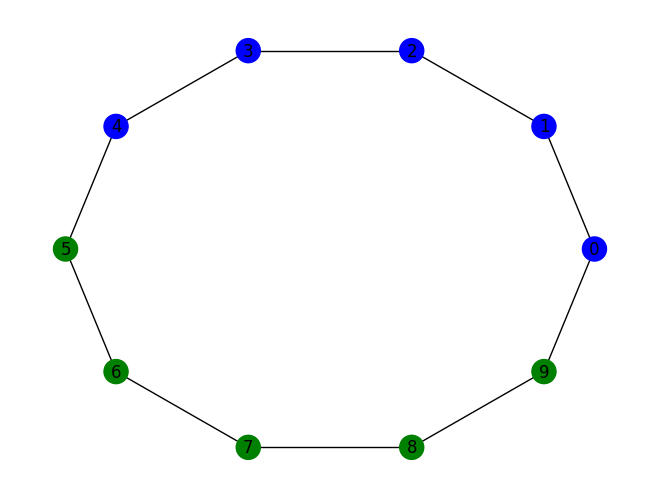

In [3]:
# Функция для расчета модулярности разбиения графа на сообщества
def calculate_modularity(G, partitions):
    modularity = com.modularity(G, partitions)
    return modularity

max_modularity = -1
optimal_k = None

# Перебор возможных значений k с учетом, что n и k — целочисленные
for k in range(1, N // 2 + 1):
    if N % k == 0:  # Проверка, что N делится на k нацело
        clusters = []
        for i in range(k):
            cluster = list(range(i * N // k, (i + 1) * N // k))
            clusters.append(cluster)
        modularity = calculate_modularity(C, clusters)
        if modularity > max_modularity:
            max_modularity = modularity
            optimal_k = k

print(f"Оптимальное число кластеров: {optimal_k}")
print(f"Оптимальный размер кластера: {N // optimal_k}")
print(f"Максимальная модулярность: {max_modularity}")

# Визуализация оптимального разбиения
clusters = []
for i in range(optimal_k):
    cluster = list(range(i * N // optimal_k, (i + 1) * N // optimal_k))
    clusters.append(cluster)

color_map = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for node in C:
    for i, cluster in enumerate(clusters):
        if node in cluster:
            color_map.append(colors[i % len(colors)])
nx.draw(C, pos, node_color=color_map, with_labels=True)
plt.show()

## Моделирование случайно-геометрического графа (12 баллов)

Рассмотрим следующую модель построения графа. Сначала случайно разместим N вершин в некотором метрическом пространстве размерности $d$ (согласно к заданному распределению вероятности), далее соединим две вершины ребром тогда и только тогда, когда расстояние между ними  меньше определенного радиуса $r$.
В NetworkX есть соответствующий [генератор](https://networkx.org/documentation/stable/reference/generated/networkx.generators.geometric.random_geometric_graph.html).

In [4]:
pip install ndlib

In [5]:
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc

1. Постройте зависимости плотности, кластеризации и размер наибольшей связанной компоненты графа от параметра $r$. Объясните полученные результаты. (3 балла)

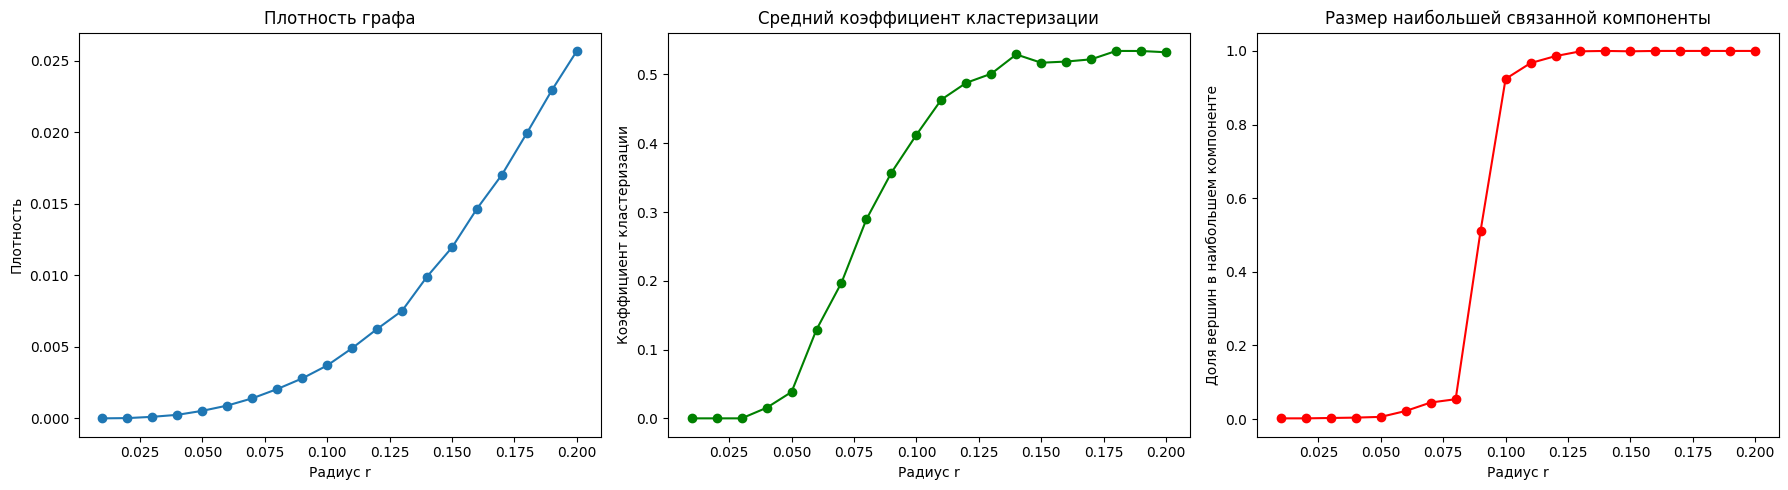

In [6]:
N = 1000 # количество вершин
dim = 3 # размерность пространства

radii = np.linspace(0.01, 0.2, 20)

densities = []
clusterings = []
largest_cc_sizes = []

for r in radii:
    G = nx.random_geometric_graph(N, r, dim=dim)

    density = nx.density(G)
    densities.append(density)

    clustering = nx.average_clustering(G)
    clusterings.append(clustering)

    largest_cc_size = len(max(nx.connected_components(G), key=len)) / N
    largest_cc_sizes.append(largest_cc_size)

plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.plot(radii, densities, marker='o')
plt.title('Плотность графа')
plt.xlabel('Радиус r')
plt.ylabel('Плотность')

plt.subplot(132)
plt.plot(radii, clusterings, marker='o', color='g')
plt.title('Средний коэффициент кластеризации')
plt.xlabel('Радиус r')
plt.ylabel('Коэффициент кластеризации')

plt.subplot(133)
plt.plot(radii, largest_cc_sizes, marker='o', color='r')
plt.title('Размер наибольшей связанной компоненты')
plt.xlabel('Радиус r')
plt.ylabel('Доля вершин в наибольшем компоненте')

plt.tight_layout()
plt.show()

- С увеличением радиуса *r*, вероятность соединения между вершинами увеличивается, что приводит к увеличению плотности графа. Плотность стремится к 1 при увеличении *r*, что указывает на переход от разреженного графа к более плотному.

- С увеличением радиуса *r* коэффициент кластеризации также увеличивается, так как более многочисленные и плотные связи между вершинами формируют много треугольников (полных триад), увеличивая локальную плотность связей.

- Размер наибольшей связанной компоненты: Начиная с некоторого малого значения радиуса *r*, значительная часть вершин будет изолирована или образует маленькие связанные группы. С увеличением *r* критические связи начнут образовываться, соединяя отдельные компоненты в одну большую связанную компоненту, размер которой стремится к размеру всего графа при дальнейшем увеличении радиуса.

2. Выберите параметры так, чтобы средняя степень графа была $<k>=5$. Исследуйте структурные свойства графа: распределение степеней, распределение коэффициентов кластеризации. Определите сообщества (количество сообществ и распределение размеров сообществ), модулярность сети. Алгоритм поиска сообществ выберите на свое усмотрение. (6 баллов)

Итоговый радиус: 0.11, Средняя степень: 4.946


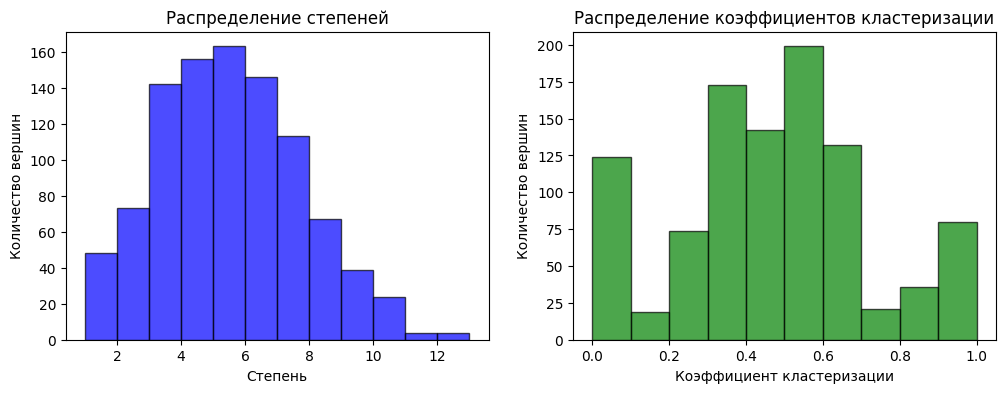

Количество сообществ: 42
Модулярность сети: 0.8424875431857755


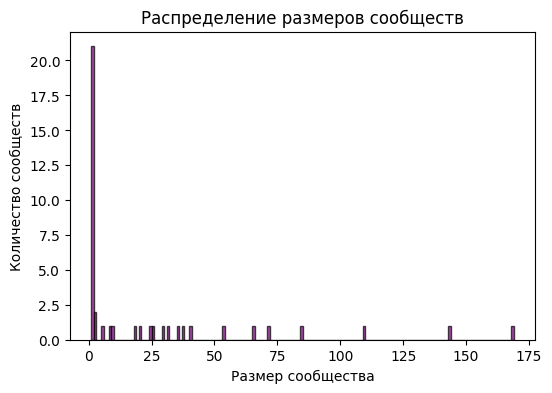

In [7]:
import networkx.algorithms.community as nxcom

target_avg_degree = 5  # целевая средняя степень вершин
initial_r = 0.1  # начальное приближение радиуса

# Создание геометрического графа
while True:
    G = nx.random_geometric_graph(N, initial_r, dim=dim)
    avg_degree = sum(dict(G.degree()).values()) / N
    if np.abs(avg_degree - target_avg_degree) < 0.1:
        break
    elif avg_degree < target_avg_degree:
        initial_r += 0.01
    else:
        initial_r -= 0.01

print(f"Итоговый радиус: {initial_r}, Средняя степень: {avg_degree}")

# Распределение степеней
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(degrees, bins=range(1, max(degrees)+1), color='blue', alpha=0.7, edgecolor='black')
plt.title('Распределение степеней')
plt.xlabel('Степень')
plt.ylabel('Количество вершин')

# Распределение коэффициентов кластеризации
clustering_coeffs = list(nx.clustering(G).values())
plt.subplot(122)
plt.hist(clustering_coeffs, bins=10, color='green', alpha=0.7, edgecolor='black')
plt.title('Распределение коэффициентов кластеризации')
plt.xlabel('Коэффициент кластеризации')
plt.ylabel('Количество вершин')
plt.show()

# Определение сообществ и модулярности сети с помощью алгоритма Лувена
communities = list(nxcom.greedy_modularity_communities(G))
modularity = nxcom.modularity(G, communities)
print(f"Количество сообществ: {len(communities)}")
print(f"Модулярность сети: {modularity}")

# Распределение размеров сообществ
community_sizes = [len(c) for c in communities]
plt.figure(figsize=(6, 4))
plt.hist(community_sizes, bins=range(min(community_sizes), max(community_sizes)+1), color='purple', alpha=0.7, edgecolor='black')
plt.title('Распределение размеров сообществ')
plt.xlabel('Размер сообщества')
plt.ylabel('Количество сообществ')
plt.show()

- Используется цикл для подбора такого значения радиуса *r*, при котором средняя степень графа приблизительно равняется 5. Значение радиуса корректируется путем инкрементов или декрементов, исходя из сравнения текущей средней степени с целевой величиной.

- Степень каждой вершины графа записывается, и строится гистограмма распределения этих степеней.

- Вычисляются коэффициенты кластеризации для каждой вершины, строится гистограмма их распределения.

- Применяется алгоритм Лувена для нахождения сообществ в сети и вычисляется модулярность сети.

- Анализируется количество вершин в каждом сообществе, строится гистограмма распределения размеров сообществ.

3. С помощью библиотеки NDlib смоделируйте SIR модель на графе. Подберите параметры $\beta$, $\gamma$ таким образом, чтобы характерное число итераций, за которое доля вершин в состоянии R становится равной 1 было около 100.
Сравните зависимости $I(t), R(t)$ для геометрического графа со случайным графов Эрдеша-Реньи той же плотности. (3 балла)

In [8]:
rgG = nx.random_geometric_graph(1000, 0.2, dim=3)


print(rgG.number_of_nodes(), rgG.number_of_edges())

1000 13267


In [9]:
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc

In [10]:
beta = 0.05
gamma = 0.05

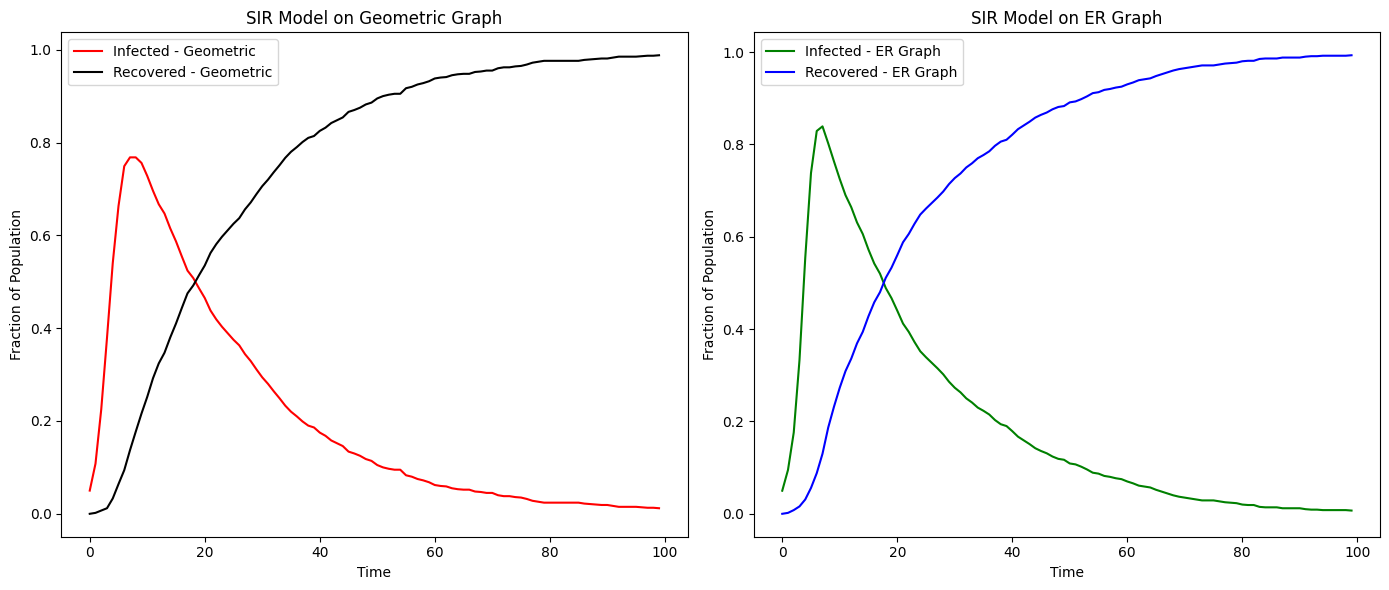

In [11]:
# Создание случайного графа Эрдеша-Реньи с таким же количеством вершин и плотностью
edge_prob = nx.density(rgG)
erG = nx.erdos_renyi_graph(N, edge_prob)

# Функция для запуска SIR модели т.к. нам нужно рассмотреть 2 разных графа
def run_sir(model_graph, beta, gamma):
    sir_model = ep.SIRModel(model_graph)

    config = mc.Configuration()
    config.add_model_parameter('beta', beta)
    config.add_model_parameter('gamma', gamma)
    config.add_model_parameter("percentage_infected", 0.05)
    sir_model.set_initial_status(config)

    iterations = sir_model.iteration_bunch(100)
    susceptible, infected, recovered = [], [], []

    for iteration in iterations:
        node_count = iteration['node_count']
        susceptible.append(node_count[0] / N)
        infected.append(node_count[1] / N)
        recovered.append(node_count[2] / N)

    return susceptible, infected, recovered

susceptible_geometric, infected_geometric, recovered_geometric = run_sir(rgG, beta, gamma)

susceptible_er, infected_er, recovered_er = run_sir(erG, beta, gamma)

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.plot(infected_geometric, color='r', label='Infected - Geometric')
plt.plot(recovered_geometric, color='k', label='Recovered - Geometric')
plt.title('SIR Model on Geometric Graph')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.legend()

plt.subplot(122)
plt.plot(infected_er, color='g', label='Infected - ER Graph')
plt.plot(recovered_er, color='b', label='Recovered - ER Graph')
plt.title('SIR Model on ER Graph')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.legend()

plt.tight_layout()
plt.show()

Инфекция и выздоровление в случайном графе Эрдеша-Реньи быстрее распространяется и достигает насыщения из-за менее ограниченной и более однородной структуры графа.
При этом графики для геометрического и Эрдеша-Реньи графов практически совпадают, однако с текущими параметрами в графе Эрдеша-Реньи примерно на значении 90 по времени кол-во выздоровевших уравнивается и становится больше чем кол-во заражённых.